In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import itertools as it
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.tree import export_graphviz 
import xgboost as xgb
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as time

## Data Cleaning

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.rename(columns = {'class':'classes'}, inplace=True)

In [4]:
data.columns.to_list()

['classes',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
data.columns = data.columns.str.strip().str.lower().str.replace('-', '_')

In [6]:
data.isna().sum()

classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
classes = {
    'e':'edible',
    'p':'poisonous'
}

cap_shapes = {
    'b':'bell',
    'c':'conical',
    'x':'convex',
    'f':'flat',
    'k':'knobbed',
    's':'sunken'
}

cap_surfaces = {
    'f':'fibrous',
    'g':'grooves',
    'y':'scaly',
    's':'smooth'
}

cap_colors = {
    'n':'brown',
    'b':'buff',
    'c':'cinnamon',
    'g':'gray',
    'r':'green',
    'p':'pink',
    'u':'purple',
    'e':'red',
    'w':'white',
    'y':'yellow'
}

bruise_class = {
    't':'bruises',
    'f':'no_bruises'
}

odors = {
    'a':'almond',
    'l':'anise',
    'c':'creosote',
    'y':'fishy',
    'f':'foul',
    'm':'musty',
    'n':'none',
    'p':'pungent',
    's':'spicy'
}

gill_attachments = {
    'a':'attached',
    'd':'descending',
    'f':'free',
    'n':'notched'
}

gill_spacings = {
    'c':'close',
    'w':'crowded',
    'd':'distant'
}

gill_sizes = {
    'b':'broad',
    'n':'narrow'
}

gill_colors = {
    'k':'black',
    'n':'brown',
    'b':'buff',
    'h':'chocolate',
    'g':'gray',
    'r':'green',
    'o':'orange',
    'p':'pink',
    'u':'purple',
    'e':'red',
    'w':'white',
    'y':'yellow'  
}

stalk_shapes = {
    'e':'enlarging',
    't':'tapering'
}

stalk_roots = {
    'b':'bulbous',
    'c':'club',
    'u':'cup',
    'e':'equal',
    'z':'rhizomorphs',
    'r':'rooted',
    '?':'NA'
}

stalk_surface_above_rings = {
    'f':'fibrous',
    'y':'scaly',
    'k':'silky',
    's':'smooth'
}

stalk_surface_below_rings = {
    'f':'fibrous',
    'y':'scaly',
    'k':'silky',
    's':'smooth'
}

stalk_color_above_rings = {
    'n':'brown',
    'b':'buff',
    'c':'cinnamon',
    'g':'gray',
    'o':'orange',
    'p':'pink',
    'e':'red',
    'w':'white',
    'y':'yellow'
}

stalk_color_below_rings = {
    'n':'brown',
    'b':'buff',
    'c':'cinnamon',
    'g':'gray',
    'o':'orange',
    'p':'pink',
    'e':'red',
    'w':'white',
    'y':'yellow'
}

veil_types = {
    'p':'partial',
    'u':'universal'
}

veil_colors = {
    'n':'brown',
    'o':'orange',
    'w':'white',
    'y':'yellow'
}

ring_numbers = {
    'n':'none',
    'o':'one',
    't':'two'
}

ring_types = {
    'c':'cobwebby',
    'e':'evanescent',
    'f':'flaring',
    'l':'large',
    'n':'none',
    'p':'pendant',
    's':'sheathing',
    'z':'zone'
}

spore_print_colors = {
    'k':'black',
    'n':'brown',
    'b':'buff',
    'h':'chocolate',
    'r':'green',
    'o':'orange',
    'u':'purple',
    'w':'white',
    'y':'yellow'  
}

populations = {
    'a':'abundant',
    'c':'clustered',
    'n':'numerous',
    's':'scattered',
    'v':'several',
    'y':'solitary'
}

habitats = {
    'g':'grasses',
    'l':'leaves',
    'm':'meadows',
    'p':'paths',
    'u':'urban',
    'w':'waste',
    'd':'woods'
}

In [9]:
data.replace({'classes': classes,
              'cap_shape': cap_shapes,
              'cap_surface': cap_surfaces,
              'cap_color': cap_colors,
              'bruises': bruise_class,
              'odor': odors,
              'gill_attachment': gill_attachments,
              'gill_spacing': gill_spacings,
              'gill_size': gill_sizes,
              'gill_color': gill_colors,
              'stalk_shape': stalk_shapes,
              'stalk_root': stalk_roots,
              'stalk_surface_above_ring': stalk_surface_above_rings,
              'stalk_surface_below_ring': stalk_surface_below_rings,
              'stalk_color_above_ring': stalk_color_above_rings,
              'stalk_color_below_ring': stalk_color_below_rings,
              'veil_type': veil_types,
              'veil_color': veil_colors,
              'ring_number': ring_numbers,
              'ring_type': ring_types,
              'spore_print_color': spore_print_colors,
              'population': populations,
              'habitat': habitats},
             inplace=True)

## Data Visualization

In [10]:
data['classes'] = np.where(data['classes'] == 'poisonous', 1, 0)

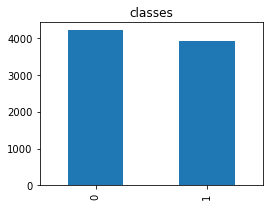

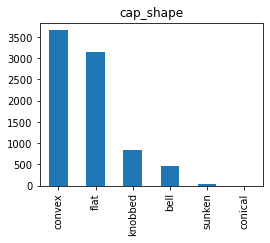

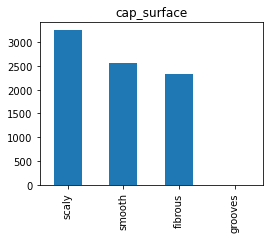

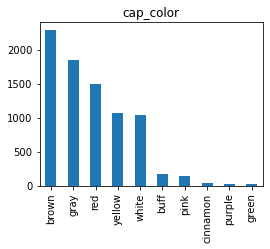

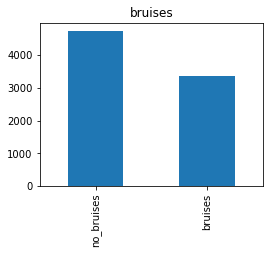

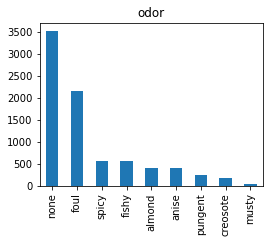

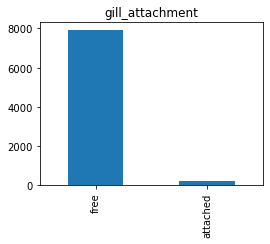

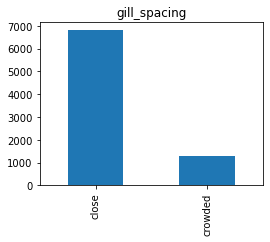

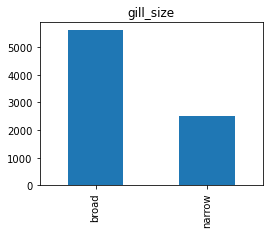

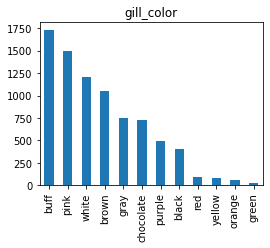

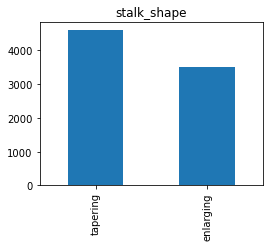

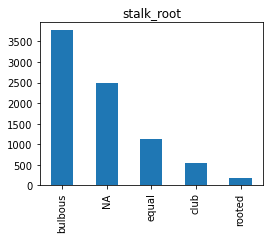

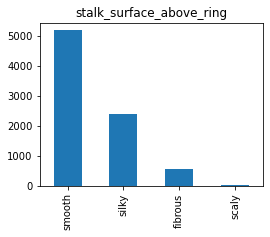

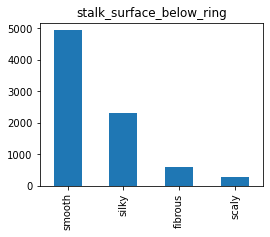

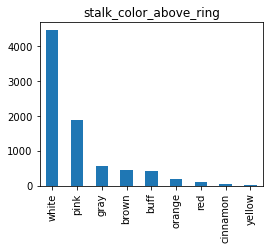

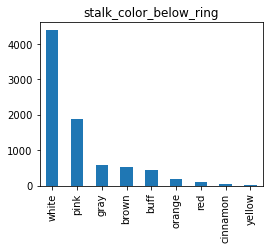

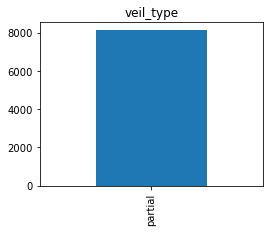

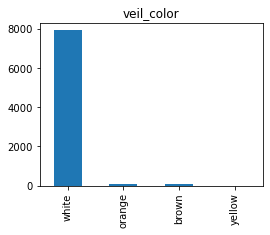

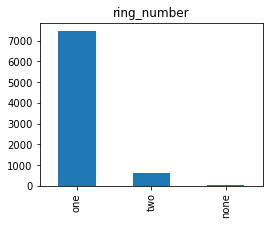

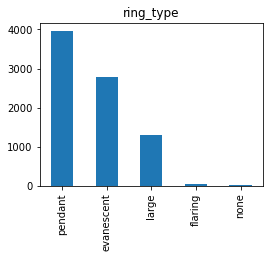

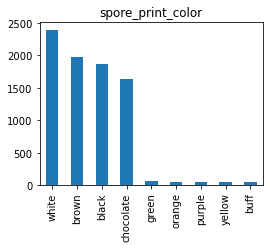

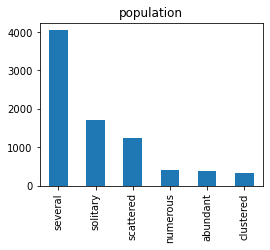

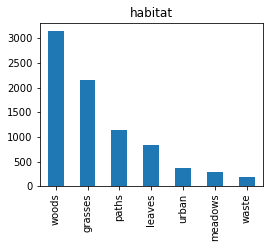

In [11]:
for col in data.columns:
    plt.figure(figsize = (4,3))
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='odor', ylabel='count'>

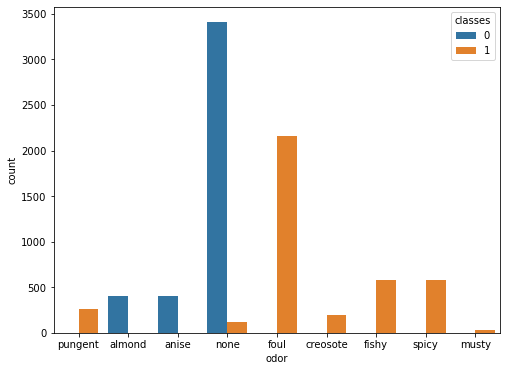

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'odor', hue = 'classes')

<AxesSubplot:xlabel='odor', ylabel='count'>

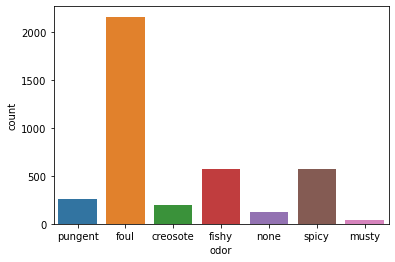

In [13]:
sns.countplot(data = data[data['classes'] == 1], x = 'odor')

<AxesSubplot:xlabel='veil_type', ylabel='count'>

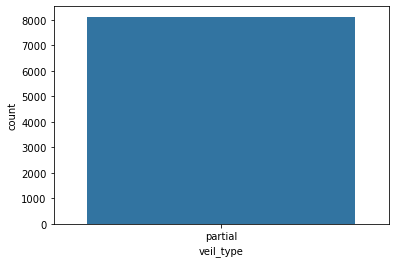

In [14]:
sns.countplot(data = data, x = 'veil_type')

In [15]:
poison_df = data[data['classes'] == 1]
edible_df = data[data['classes'] == 0]

<AxesSubplot:xlabel='gill_color', ylabel='count'>

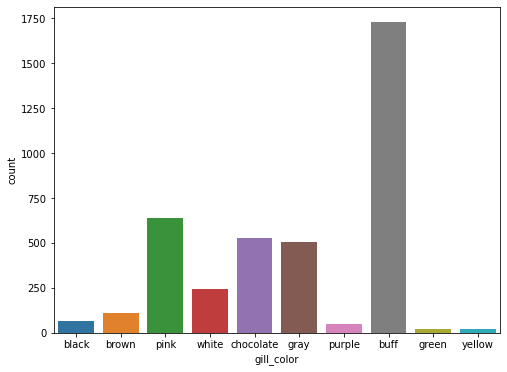

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(data=poison_df, x='gill_color')

<AxesSubplot:xlabel='gill_color', ylabel='count'>

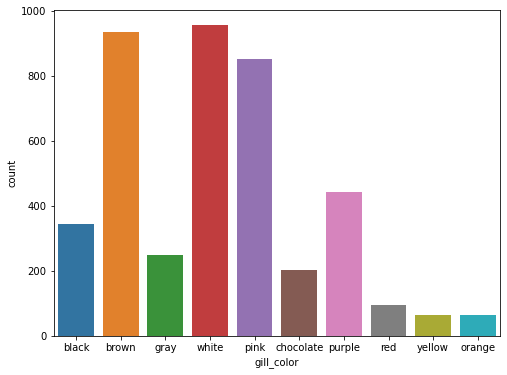

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(data=edible_df, x='gill_color')

## Confusion Matrix Functions

In [18]:
#Function to compute confusion matrix and prediction accuracy on test/train data -- Decision Tree
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict_proba(data)[:,1]
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = 100*(cm[0,0]+cm[1,1])/cm.sum()
    fpr = 100*(cm[0,1])/(cm[0,1]+cm[0,0])
    fnr = 100*(cm[1,0])/(cm[1,0]+cm[1,1])
    recall = 100*(cm[1,1])/(cm[1,0]+cm[1,1])
    print("Accuracy = ", accuracy)
    print("Recall = ", recall)
    print("FPR = ", fpr)
    print("FNR = ", fnr)
    print("Confusion matrix = \n", cm_df)
    return (" ")

In [19]:
#Function to compute confusion matrix and prediction accuracy on test/train data -- Decision Tree
def confusion_matrix_data_logit(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = 100*(cm[0,0]+cm[1,1])/cm.sum()
    fnr = 100*(cm[1,0])/(cm[1,0]+cm[1,1])
    print("Accuracy = ", accuracy)
    print("FNR = ", fnr)
    print("Confusion matrix = \n", cm_df)
    return (" ")

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=1)

In [21]:
print(train.shape)
print(test.shape)

(5443, 23)
(2681, 23)


## Linear model -- LOGISTIC REGRESSION

In [22]:
train.columns.to_list()

['classes',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [23]:
train_m1 = train[['classes',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']]

test_m1 = test[['classes',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']]

In [24]:
X=data.drop(['classes', 'odor', 'veil_type'],axis=1) #Predictors
y=data['classes'] #Response

In [25]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [26]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [32]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9998

Standard Deviation:	0.0005


## Non-linear model -- DECISION TREE

In [33]:
train_m2 = pd.get_dummies(train)
test_m2 = pd.get_dummies(test)

In [34]:
X2 = train_m2.drop(columns = 'classes')
X2test = test_m2.drop(columns = 'classes')
y2 = train_m2['classes']
y2test = test_m2['classes']

In [35]:
model2 = DecisionTreeClassifier(random_state=1, max_depth=3) 
model2.fit(X2, y2)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [36]:
confusion_matrix_data(X2, train_m2.classes, model2, cutoff=0.5)

Accuracy =  98.40161675546574
Recall =  99.88461538461539
FPR =  2.9546253957087583
FNR =  0.11538461538461539
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       2759.0         84.0
Actual 1          3.0       2597.0


' '

In [37]:
X2.columns[pd.Series(model2.feature_importances_ > 0)]

Index(['odor_none', 'stalk_root_club', 'stalk_surface_below_ring_scaly',
       'stalk_surface_below_ring_smooth', 'spore_print_color_green'],
      dtype='object')

In [38]:
model2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6656145 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1827068 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09808967, 0.        , 0.01753364, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Data Cleaning for further models

In [39]:
train.columns.to_list()

['classes',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [40]:
train.gill_spacing.value_counts()

close      4544
crowded     899
Name: gill_spacing, dtype: int64

In [41]:
train.gill_size.value_counts()

broad     3771
narrow    1672
Name: gill_size, dtype: int64

In [42]:
train.stalk_root.value_counts()

bulbous    2555
NA         1653
equal       750
club        362
rooted      123
Name: stalk_root, dtype: int64

In [43]:
train.stalk_surface_above_ring.value_counts()

smooth     3477
silky      1584
fibrous     366
scaly        16
Name: stalk_surface_above_ring, dtype: int64

In [44]:
train.population.value_counts()

several      2724
solitary     1143
scattered     822
numerous      278
abundant      257
clustered     219
Name: population, dtype: int64

## RANDOM FOREST

In [83]:
train_m3 = pd.get_dummies(train[['classes','cap_shape', 'cap_surface', 'cap_color', 'habitat', 'stalk_shape']])
test_m3 = pd.get_dummies(test[['classes','cap_shape', 'cap_surface', 'cap_color', 'habitat', 'stalk_shape']])

In [84]:
X = train_m3.drop(columns = 'classes')
Xtest = test_m3.drop(columns = 'classes')
y = train_m3['classes']
ytest = test_m3['classes']

In [47]:
params = {'n_estimators': [500],
          'max_features': range(1,6),
         }

param_list = list(it.product(*(params[Name] for Name in list(params.keys()))))
recall = [0]*len(param_list)

i=0
for pr in param_list:
    model = RandomForestClassifier(random_state=1,
                                   oob_score=True,
                                   verbose=False,
                                   n_estimators = pr[0],
                                   max_features=pr[1], 
                                   n_jobs=-1).fit(X,y)
    oob_pred = model.oob_decision_function_[:,1]
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(y, oob_pred, bins=bins)[0]
    recall[i] = 100*(cm[1,1])/(cm[1,0]+cm[1,1])
    i=i+1
    
end_time = time.time()

print("max recall = ", np.max(recall))
print("params= ", param_list[np.argmax(recall)])

max recall =  90.5
params=  (500, 1)


In [48]:
model3 = RandomForestClassifier(random_state=1, n_jobs=-1, max_features=1, n_estimators=100).fit(X, y)

In [49]:
confusion_matrix_data(X, y, model3, cutoff=0.5)

Accuracy =  93.7167003490722
Recall =  90.84615384615384
FPR =  3.658107632782272
FNR =  9.153846153846153
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       2739.0        104.0
Actual 1        238.0       2362.0


' '

In [50]:
confusion_matrix_data(Xtest, ytest, model3, cutoff=0.5)

Accuracy =  92.83849309958971
Recall =  91.48936170212765
FPR =  5.86080586080586
FNR =  8.51063829787234
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       1285.0         80.0
Actual 1        112.0       1204.0


' '

## Tuned Decision Tree -- Rule of Five

In [51]:
param_grid = {    
    'max_depth': range(1,5),
    'max_leaf_nodes': range(1,30),
    'max_features': range(1,5),
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                           param_grid, 
                           scoring=['precision','recall','accuracy'], 
                           refit="recall", 
                           cv=skf, 
                           n_jobs=-1, 
                           verbose = True).fit(X,y)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 5 folds for each of 464 candidates, totalling 2320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 762 tasks      | elapsed:    2.2s


Best params for recall
{'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 5}


[Parallel(n_jobs=-1)]: Done 2320 out of 2320 | elapsed:    4.8s finished


In [86]:
model4 = DecisionTreeClassifier(random_state=1, max_depth = 4, max_features = 4, max_leaf_nodes=5)

model4.fit(X,y)                            
print(confusion_matrix_data(X,y,model4))
print(confusion_matrix_data(Xtest,ytest,model4,cutoff=0.2))

Accuracy =  59.02994672055851
Recall =  88.53846153846153
FPR =  67.95638410130144
FNR =  11.461538461538462
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0        911.0       1932.0
Actual 1        298.0       2302.0
 
Accuracy =  59.716523685192094
Recall =  95.82066869300913
FPR =  75.0915750915751
FNR =  4.179331306990881
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0        340.0       1025.0
Actual 1         55.0       1261.0
 


In [53]:
ypred = model4.predict_proba(X)[:, 1]
p, r, thresholds = precision_recall_curve(y, ypred)

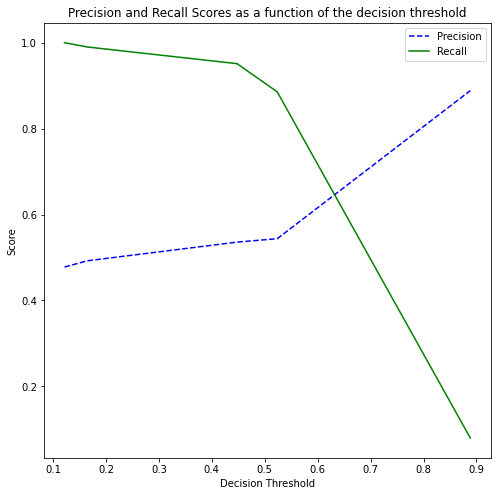

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds)

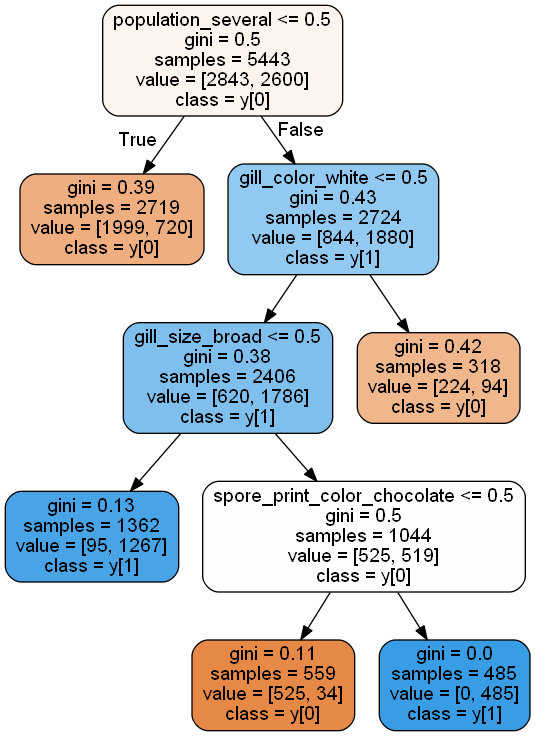

In [82]:
#Visualizing the regression tree
dot_data = StringIO()
export_graphviz(model4, out_file=dot_data,  
                filled=True, rounded=True, class_names=True,
                feature_names =X.columns,precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car_price_tree.png')
Image(graph.create_png())

### Finding most accurate prediction subset

In [56]:
#The following function finds indices of the leaf nodes, given the decision tree model.
#The indices of nodes in a decision tree starts at the top from 0. 
#The child nodes obtained from the first split have indices 1 (left) and 2 (right), 
#the child nodes obtained from the second split have indices 3 (left) and 4 (right), and so on.
def leaf_nodes_indices(model):
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    leaf_nodes = []
    for i in range(model.tree_.node_count):
        if children_left[i] == children_right[i]:
            leaf_nodes.append(i)
    return leaf_nodes

#The following function finds the *mean squared error* of nodes with indices *node_indices*
def mse(model,node_indices):
    return model.tree_.impurity[node_indices]

#The following function gives the decision rules for a node with index as *node_index*
def decision_rules(model,node_index):
    child_node = node_index
    node_list=[]
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    features=model.tree_.feature
    fnames = X.columns
    threshold = model.tree_.threshold
    p=1
    while p>0:
        if node_index%2>0:
            p= np.where(children_left==node_index)[0][0]
        else:
            p= np.where(children_right==node_index)[0][0]
        node_list.append(p)
        node_index=p
    node_list.reverse()
    node_list.append(child_node)
    cc=1
    for n in node_list[0:(len(node_list)-1)]:
        cnode = node_list[cc]
        if cnode%2==0:
            ineq_sign = ">"
        else:
            ineq_sign = "<="
        print("Split "+ str(cc)+":"+fnames[features][n]+ineq_sign+str(threshold[n]))
        cc=cc+1
    node_list=[]
    return ""

In [57]:
nodes = leaf_nodes_indices(model4)
m = nodes[0]
for i in nodes:
    if mse(model4, i)< m:
        m=i
print("leaf=",m, "mse=", mse(model4, m))

leaf= 8 mse= 0.2134684251899729


In [59]:
print(decision_rules(model4, 8))

Split 1:habitat_grasses>0.5
Split 2:stalk_shape_tapering<=0.5
Split 3:cap_shape_flat<=0.5
Split 4:cap_color_white>0.5



In [60]:
test_filtered = test_m3[(test_m3.habitat_grasses<=0.5) & 
                     (test_m3.stalk_shape_tapering<=0.5) &
                     (test_m3.cap_color_brown<=0.5) &
                     (test_m3.cap_surface_smooth>0.5) &
                     (test_m3.cap_color_pink<=0.5) &
                     (test_m3.habitat_waste<=0.5) &
                     (test_m3.cap_color_white>0.5) &
                     (test_m3.habitat_meadows>0.5)]

In [61]:
Xtest_filt = test_filtered.drop(columns = 'classes')
ytest_filt = test_filtered['classes']

In [62]:
print(confusion_matrix_data(Xtest_filt,ytest_filt,model4))

Accuracy =  8.695652173913043
Recall =  100.0
FPR =  100.0
FNR =  0.0
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0          0.0         21.0
Actual 1          0.0          2.0
 


## Tuned Decision Tree (more predictors) - Max Depth 3

In [63]:
train_m4 = pd.get_dummies(train.drop(columns = ['odor','veil_type']))
test_m4 = pd.get_dummies(test.drop(columns = ['odor','veil_type']))

In [64]:
X = train_m4.drop(columns = 'classes')
Xtest = test_m4.drop(columns = 'classes')
y = train_m4['classes']
ytest = test_m4['classes']

In [65]:
param_grid = {
    'max_leaf_nodes': range(10,40),
    'max_features': range(1,108),
    'max_depth': range(1,9)
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                           param_grid, 
                           scoring=['precision','recall','accuracy'], 
                           refit="recall", 
                           cv=skf, 
                           n_jobs=-1, 
                           verbose = True).fit(X,y)

print('Best params for recall')
print(grid_search.best_params_)

Fitting 5 folds for each of 25680 candidates, totalling 128400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 19000 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 25000 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 31800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 39400 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 47800 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 57000 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 67000 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 77800 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 89400

Best params for recall
{'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': 10}


In [66]:
model5 = DecisionTreeClassifier(random_state=1, max_features = 2, max_leaf_nodes=10, max_depth = 5)

model5.fit(X,y)                            
print(confusion_matrix_data(X,y,model5))
print(confusion_matrix_data(Xtest,ytest,model5))

Accuracy =  75.27099026272276
Recall =  100.0
FPR =  47.34435455504749
FNR =  0.0
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       1497.0       1346.0
Actual 1          0.0       2600.0
 
Accuracy =  75.60611712047744
Recall =  100.0
FPR =  47.91208791208791
FNR =  0.0
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0        711.0        654.0
Actual 1          0.0       1316.0
 


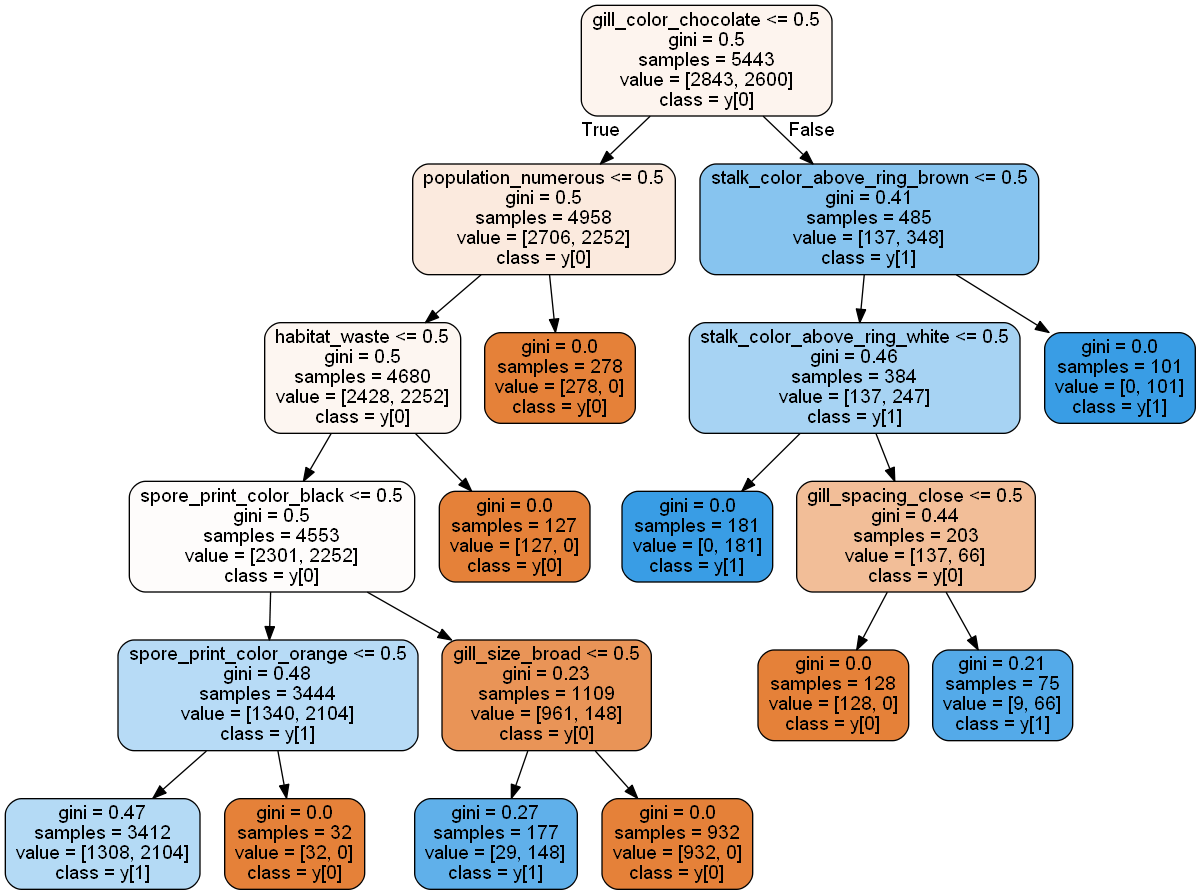

In [67]:
#Visualizing the regression tree
dot_data = StringIO()
export_graphviz(model5, out_file=dot_data,  
                filled=True, rounded=True, class_names = True,
                feature_names =X.columns,precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('car_price_tree.png')
Image(graph.create_png())

In [68]:
X.columns[pd.Series(model5.feature_importances_ > 0)]

Index(['gill_spacing_close', 'gill_size_broad', 'gill_color_chocolate',
       'stalk_color_above_ring_brown', 'stalk_color_above_ring_white',
       'spore_print_color_black', 'spore_print_color_orange',
       'population_numerous', 'habitat_waste'],
      dtype='object')

In [69]:
train_m5 = pd.get_dummies(train[['classes', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_color_above_ring',
                              'spore_print_color', 'population', 'habitat']])
test_m5 = pd.get_dummies(test[['classes', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_color_above_ring',
                              'spore_print_color', 'population', 'habitat']])

In [70]:
X = train_m5.drop(columns = 'classes')
Xtest = test_m5.drop(columns = 'classes')
y = train_m5['classes']
ytest = test_m5['classes']

In [71]:
param_grid = {
    'max_leaf_nodes': range(10,40),
    'max_features': range(1,48),
    'max_depth': range(1,9)
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                           param_grid, 
                           scoring=['precision','recall','accuracy'], 
                           refit="recall", 
                           cv=skf, 
                           n_jobs=-1, 
                           verbose = True).fit(X,y)

print('Best params for recall')
print(grid_search.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 11280 candidates, totalling 56400 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 19000 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 25000 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 31800 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 39400 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 47800 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 56400 out of 56400 | elapsed:  2.2min finished


Best params for recall
{'max_depth': 6, 'max_features': 25, 'max_leaf_nodes': 15}


In [72]:
model6 = DecisionTreeClassifier(random_state=1, max_features = 25, max_leaf_nodes=15, max_depth = 6)

model6.fit(X,y)                            
print(confusion_matrix_data(X,y,model6))
print(confusion_matrix_data(Xtest,ytest,model6))

Accuracy =  99.11813338232592
Recall =  99.46153846153847
FPR =  1.1959198030249736
FNR =  0.5384615384615384
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       2809.0         34.0
Actual 1         14.0       2586.0
 
Accuracy =  99.10481163744872
Recall =  99.24012158054711
FPR =  1.0256410256410255
FNR =  0.7598784194528876
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       1351.0         14.0
Actual 1         10.0       1306.0
 


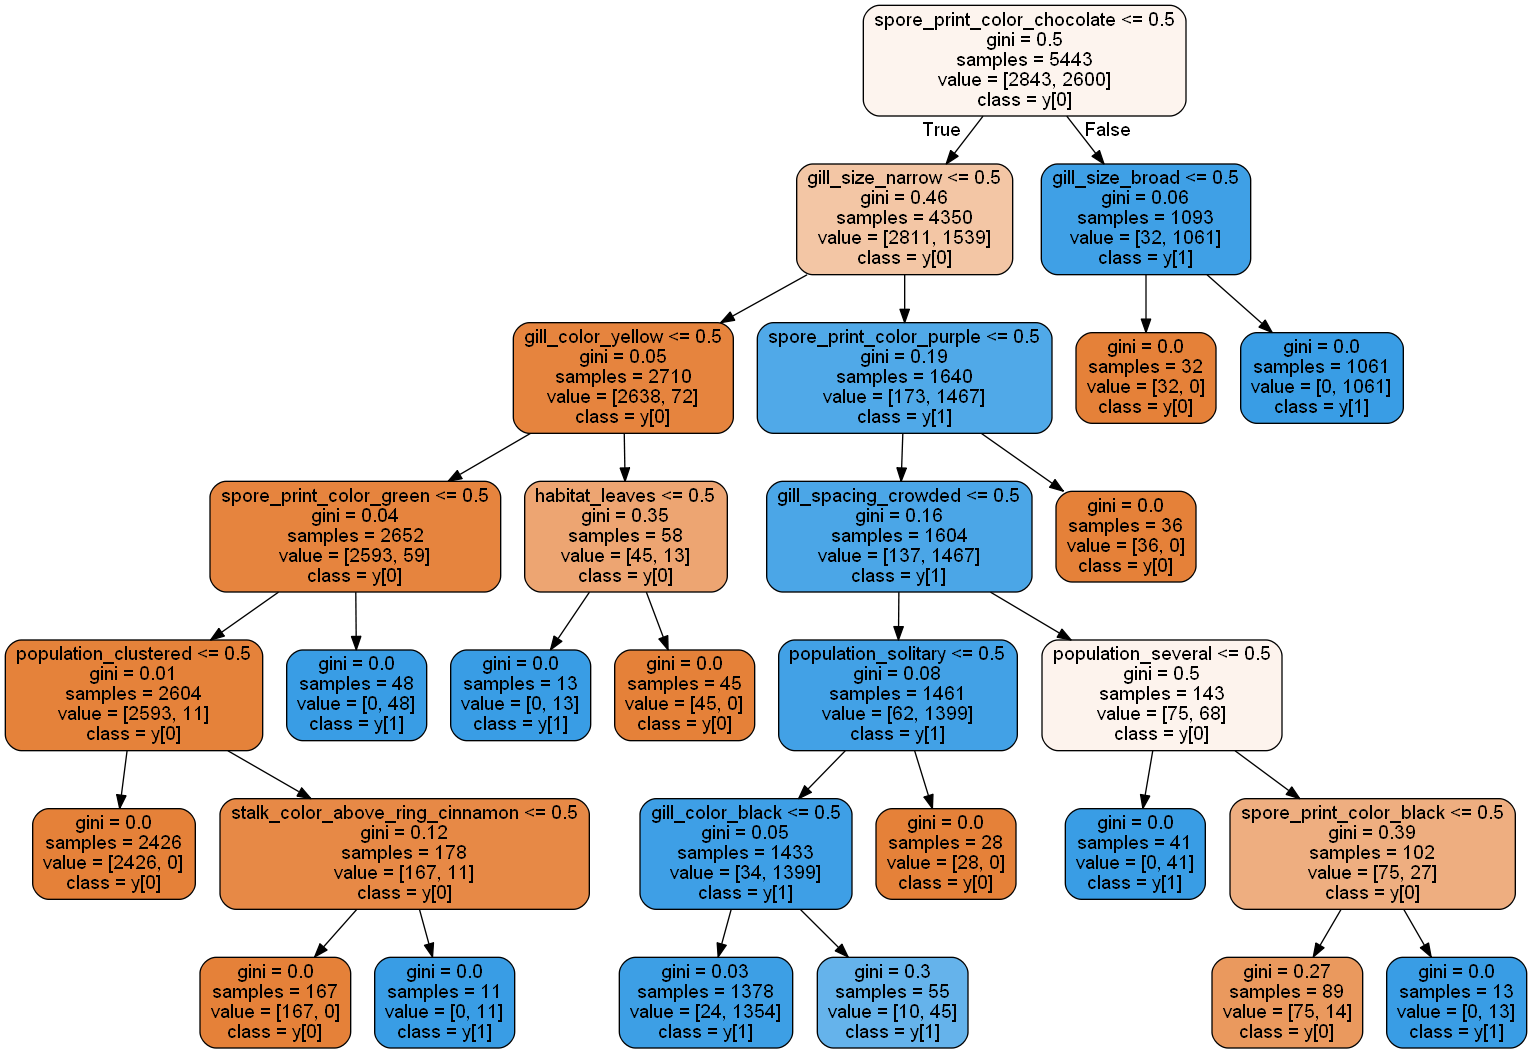

In [73]:
#Visualizing the decision tree
dot_data = StringIO()
export_graphviz(model6, out_file=dot_data,  
                filled=True, rounded=True, class_names = True,
                feature_names =X.columns,precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('car_price_tree.png')
Image(graph.create_png())

## ENSEMBLE MODEL

### Decision Tree

In [74]:
m1 = model6

### Random Forest

In [75]:
params = {'n_estimators': [500],
          'max_features': range(1,48),
         }

param_list=list(it.product(*(params[Name] for Name in list(params.keys()))))
recall = [0]*len(param_list)

i=0
for pr in param_list:
    model = RandomForestClassifier(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                  max_features=pr[1], n_jobs=-1).fit(X,y)
    oob_pred = model.oob_decision_function_[:,1]
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(y, oob_pred, bins=bins)[0]
    recall[i] = 100*(cm[1,1])/(cm[1,0]+cm[1,1])
    i=i+1

print("max recall = ", np.max(recall))
print("params= ", param_list[np.argmax(recall)])

max recall =  99.3076923076923
params=  (500, 1)


In [76]:
m2 = RandomForestClassifier(random_state=1,n_jobs=-1,max_features=1,n_estimators=500).fit(X, y)

### XGBoost

In [77]:
param_grid = {'n_estimators':[25,100,500],
              'max_depth': [6,7,8],
              'learning_rate': [0.01,0.1,0.2],
              'gamma': [0.1,0.25,0.5],
              'reg_lambda':[0,0.01,0.001],
              'scale_pos_weight':[1.25,1.5,1.75]
             }

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,
                                                         use_label_encoder=False),
                             param_grid = param_grid,
                             scoring = 'accuracy',
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv).fit(X,y)

print(optimal_params.best_params_,optimal_params.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 16.1min


{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 25, 'reg_lambda': 0, 'scale_pos_weight': 1.25} 0.9932027494193271


[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed: 18.7min finished


In [78]:
m3 = xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,gamma=0.1,learning_rate = 0.2,max_depth=6,
                              n_estimators = 25,reg_lambda = 0,scale_pos_weight=1.25,use_label_encoder=False).fit(X,y)

### Stacking Classifier

In [79]:
ensemble_model = StackingClassifier(estimators=[('dt',m1),('rf',m2),('xgb',m3)],
                                   final_estimator=LogisticRegression(random_state=1,max_iter=10000),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model.fit(X,y)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_features=25,
                                                       max_leaf_nodes=15,
                                                       random_state=1)),
                               ('rf',
                                RandomForestClassifier(max_features=1,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=1)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_by...
                              

In [80]:
print(confusion_matrix_data(X,y,ensemble_model))
print(confusion_matrix_data(Xtest,ytest,ensemble_model))

Accuracy =  99.33860003674444
Recall =  99.61538461538461
FPR =  0.914526908195568
FNR =  0.38461538461538464
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       2817.0         26.0
Actual 1         10.0       2590.0
 
Accuracy =  99.55240581872435
Recall =  99.84802431610942
FPR =  0.7326007326007326
FNR =  0.1519756838905775
Confusion matrix = 
           Predicted 0  Predicted 1
Actual 0       1355.0         10.0
Actual 1          2.0       1314.0
 
